<a href="https://colab.research.google.com/github/brainmentorspvtltd/MSIT_FDP_DeepLearning/blob/main/CNN_SkinDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.environ["KAGGLE_USERNAME"] = "brainmentors"
os.environ["KAGGLE_KEY"] = "81e322ac13ccf13db86bb58551f59998"

!kaggle datasets download fanconic/skin-cancer-malignant-vs-benign

skin-cancer-malignant-vs-benign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip skin-cancer-malignant-vs-benign.zip

Archive:  skin-cancer-malignant-vs-benign.zip
replace data/test/benign/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img = cv2.imread('train/benign/1000.jpg')

In [ ]:
img.shape

(224, 224, 3)

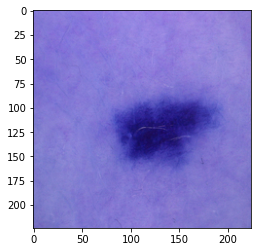

In [ ]:
plt.imshow(img)

In [ ]:
train_path = "data/train/"
test_path = "data/test/"

In [ ]:
len(os.listdir(train_path + "malignant"))

1197

In [ ]:
len(os.listdir(train_path + "benign"))

1440

In [ ]:
import keras
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255., horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_gen = train_datagen.flow_from_directory(train_path, 
                                              class_mode="binary",
                                              batch_size = 64, target_size=(224,224))

test_gen = train_datagen.flow_from_directory(test_path, 
                                              class_mode="binary",
                                              batch_size = 64, target_size=(224,224))

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
model = Sequential([
    Conv2D(32, 3, input_shape=(224,224,3), activation="relu"),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(16, 3, activation="relu"),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(16, 3, activation="relu"),
    MaxPool2D(pool_size = (2,2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(1, activation="sigmoid"),
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 16)      4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 16)      

In [ ]:
model.compile(optimizer="adam",
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
model.fit(train_gen, validation_data = test_gen, epochs=10)

Epoch 1/10
42/42 [==============================] - 14s 225ms/step - loss: 0.5435 - accuracy: 0.7110 - val_loss: 0.4281 - val_accuracy: 0.7848
Epoch 2/10
42/42 [==============================] - 10s 239ms/step - loss: 0.4438 - accuracy: 0.7846 - val_loss: 0.4242 - val_accuracy: 0.8000
Epoch 3/10
42/42 [==============================] - 9s 217ms/step - loss: 0.4352 - accuracy: 0.7899 - val_loss: 0.4800 - val_accuracy: 0.7818
Epoch 4/10
42/42 [==============================] - 9s 219ms/step - loss: 0.4344 - accuracy: 0.7960 - val_loss: 0.4083 - val_accuracy: 0.7652
Epoch 5/10
42/42 [==============================] - 10s 236ms/step - loss: 0.3999 - accuracy: 0.8005 - val_loss: 0.3768 - val_accuracy: 0.7939
Epoch 6/10
42/42 [==============================] - 9s 217ms/step - loss: 0.3738 - accuracy: 0.8176 - val_loss: 0.4444 - val_accuracy: 0.7864
Epoch 7/10
42/42 [==============================] - 9s 217ms/step - loss: 0.3694 - accuracy: 0.8142 - val_loss: 0.3925 - val_accuracy: 0.8197
Epo